In [2]:
from ipywidgets import widgets, Layout
import os
import warnings
from plotly.subplots import make_subplots
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pio.renderers.default = 'jupyterlab'
pio.templates.default = "plotly_dark"
warnings.simplefilter(action='ignore')
import itertools
plt.style.use('fivethirtyeight')

In [3]:
rain = pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions = list(rain.columns.values)[5:]
years = list(rain['year'].unique())
monsoon_list = [i for i in range(150, 281)]
rain_monsoon = rain[rain['day-number'].isin(monsoon_list)]

In [4]:
rain=rain.set_index('date',drop=False)

In [8]:
rain.isna().sum()

year                  0
day-number            0
date                  0
month                 0
day-of-month          0
ajmer              1127
alwar               765
banswara            370
baran             12418
barmer             5511
bharatpur           824
bhilwara            367
bikaner            2195
bundi               399
chittorgarh         733
churu               429
dausa              4480
dholpur           10227
dungarpur           369
hanumangarh       13514
jaipur              370
jaisalmer           370
jalore              370
jhunjhunu           370
jodhpur             369
karoli            14975
kota               7306
nagaur              370
pali                401
pratapgarh        18627
rajsamand         12814
sawai madhopur     5849
sikar                35
sirohi                4
ganganagar          370
tonk               1466
udaipur               5
aw                    1
bshw                  1
cwq                 368
bwhw                369
sub humid       

In [5]:
rain[rain['ajmer'].isnull()]
ajmer=rain.iloc[:,[5]]
ajmer.head(25)

,ajmer
date,
1957-01-01,0.00
1957-01-02,0.00
1957-01-03,0.00
1957-01-04,0.00
1957-01-05,0.00
1957-01-06,0.00
1957-01-07,0.08
1957-01-08,16.22
1957-01-09,6.71


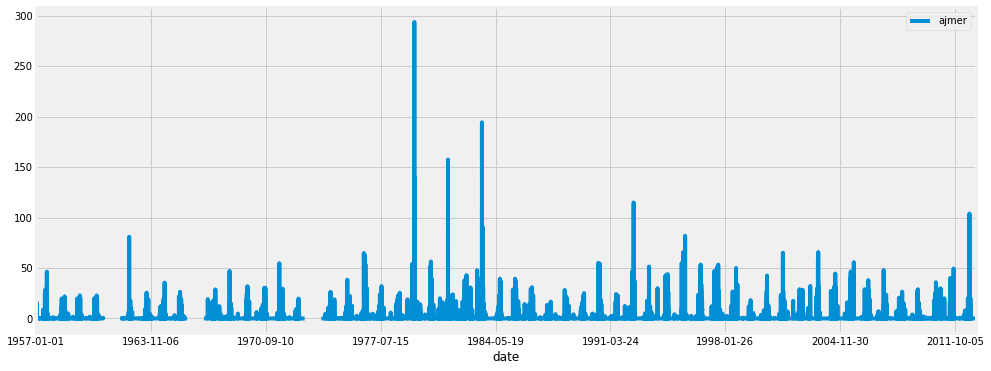

In [6]:
ajmer.plot(figsize=(15, 6))
plt.show()

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ajmer,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:122974.30033881054
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:122585.11097306012
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:133452.93221269854
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:122033.83703060061
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:122517.40843183588
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:122136.71020919623
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:127918.18586889366
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:121841.8707490568
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:120079.25596809335
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:119842.90557889955
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:131433.68951435506
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:119468.00137850127
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:119826.34016819968
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:119615.15505102303
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:125925.94370022425
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:119366.419477621
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:126265.44125980473
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:126183.0208010

In [9]:
mod = sm.tsa.statespace.SARIMAX(ajmer,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

ajmer_results = mod.fit()

print(ajmer_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2826      0.001    197.105      0.000       0.280       0.285
ma.L1         -1.0537      0.001  -1131.139      0.000      -1.056      -1.052
ar.S.L12       0.0003      0.003      0.094      0.925      -0.006       0.007
ma.S.L12      -1.0000      0.173     -5.782      0.000      -1.339      -0.661
sigma2        24.4500      4.236      5.772      0.000      16.148      32.752


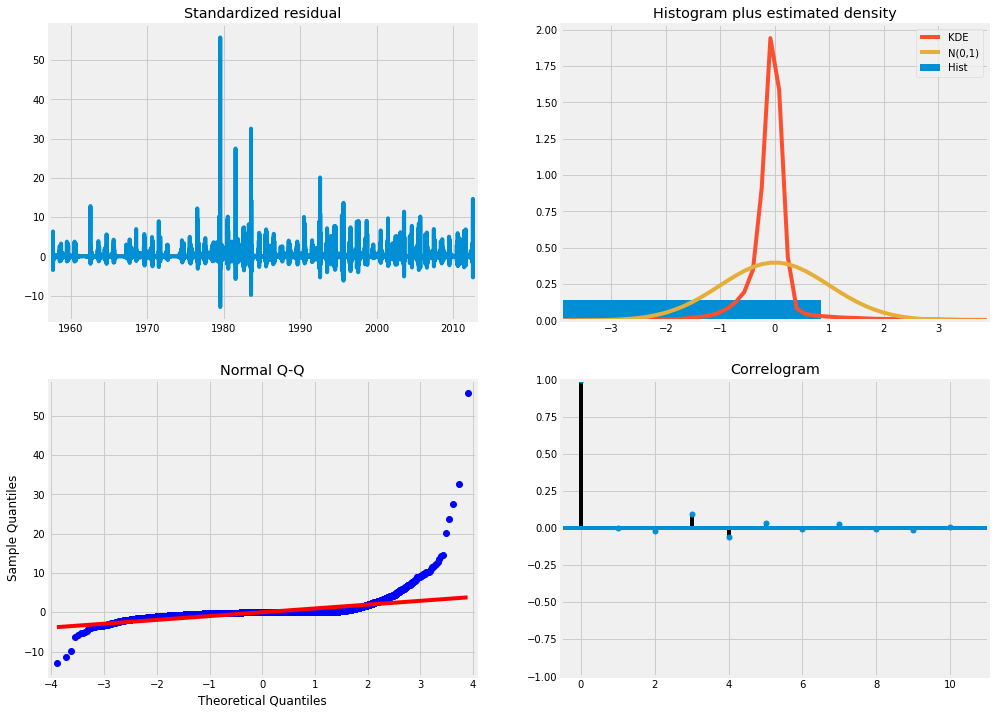

In [10]:
ajmer_results.plot_diagnostics(figsize=(15, 12))
plt.show()